In [2]:
import gempy as gp
import gempy_viewer as gpv
import vtk
import pyvista as pv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, time
from gempy.core.data import Grid

In [3]:
nx, ny, nz= 10, 10, 15
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[0, 2000, 
            0, 2000, 
            0, 750], #x, y, z
    resolution=[nx, ny, nz],
    refinement=4, # We will use octrees
    importer_helper= gp.data.ImporterHelper(
        path_to_orientations= "simple_fault_model_orientations.csv",
        path_to_surface_points= "simple_fault_model_points.csv",

    )
)

In [4]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
1244.46,0.00,54.00,73504570,0.00
1344.62,0.00,330.15,73504570,0.00
1458.80,0.00,644.90,73504570,0.00
1244.46,500.00,54.00,73504570,0.00
1344.13,500.00,328.79,73504570,0.00
1458.80,500.00,644.90,73504570,0.00
1244.46,1000.00,54.00,73504570,0.00
1343.40,1000.00,326.78,73504570,0.00
1458.80,1000.00,644.90,73504570,0.00
1244.46,1500.00,54.00,73504570,0.00


In [5]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
1322.11,1000.00,268.08,-0.94,-0.00,0.34,73504570,0.01
781.20,1000.00,242.82,0.93,0.00,0.38,176031033,0.01
406.82,1000.00,372.81,0.21,0.00,0.98,278436253,0.01
1045.88,1000.00,292.69,0.21,0.00,0.98,278436253,0.01
1713.79,1000.00,372.72,0.21,0.00,0.98,278436253,0.01
324.83,1000.00,563.18,0.21,0.00,0.98,302994462,0.01
1041.29,1000.00,483.25,0.21,0.00,0.98,302994462,0.01
1714.45,1000.00,562.70,0.21,0.00,0.98,302994462,0.01
461.80,1000.00,187.80,0.21,0.00,0.98,458800638,0.01
1050.42,1000.00,107.71,0.21,0.00,0.98,458800638,0.01


In [6]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault_Der,
	color=#015482,
	is_active=True
),
Element(
	name=Main_Fault_Izq,
	color=#9f0052,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#728f02,
	is_active=True
),
Element(
	name=Shale,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [7]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
         "Fault_Series": ('Main_Fault_Izq', 'Main_Fault_Der'),
        "Strat_Series1": ('Shale', 'Sandstone_1', 'Sandstone_2'),     
    }
)
geo_model.structural_frame  # Display the resulting structural frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault_Izq,
	color=#9f0052,
	is_active=True
),
Element(
	name=Main_Fault_Der,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Shale,
	color=#443988,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [8]:
gp.set_is_fault(
    frame=geo_model.structural_frame,
    fault_groups=['Fault_Series']
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault_Izq,
	color=#527682,
	is_active=True
),
Element(
	name=Main_Fault_Der,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Shale,
	color=#443988,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

c:\Users\gabri\anaconda3\envs\Auxiliatura_Devito\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


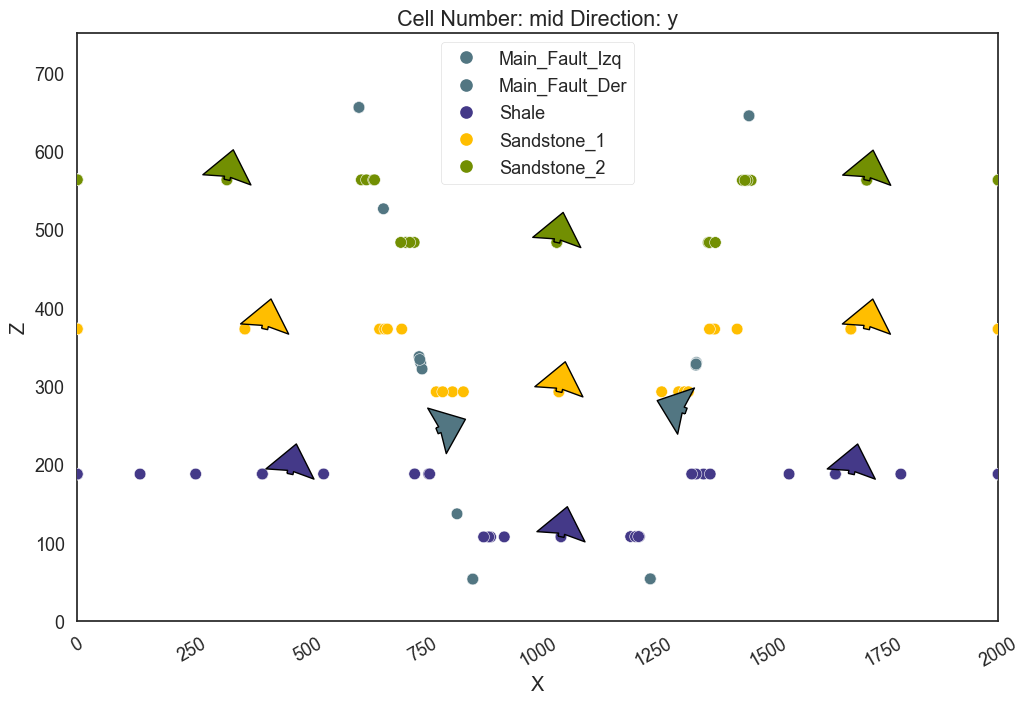

In [9]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False,)

In [10]:
geo_model.grid

Grid(values=array([[ 100.,  100.,   25.],
       [ 100.,  100.,   75.],
       [ 100.,  100.,  125.],
       ...,
       [1900., 1900.,  625.],
       [1900., 1900.,  675.],
       [1900., 1900.,  725.]]), length=array([], dtype=float64), _octree_grid=None, _dense_grid=RegularGrid(resolution=array([10, 10, 15]), extent=array([   0., 2000.,    0., 2000.,    0.,  750.]), values=array([[ 100.,  100.,   25.],
       [ 100.,  100.,   75.],
       [ 100.,  100.,  125.],
       ...,
       [1900., 1900.,  625.],
       [1900., 1900.,  675.],
       [1900., 1900.,  725.]]), mask_topo=array([], shape=(0, 3), dtype=bool), _transform=None), _custom_grid=None, _topography=None, _sections=None, _centered_grid=None, _transform=None, _octree_levels=-1)

In [11]:
geo_model.solutions

In [12]:
gp.compute_model(geo_model)
gpv.plot_3d(model=geo_model,
            plotter_type='basic',
            # kwargs_plot_structured_grid={'opacity': .1},
            show_surfaces=False,
            show_topography=False,
            show_data=False,
            show_lith=True,

            image=False,
            legend=True,

            )

Setting Backend To: AvailableBackends.numpy
Chunking done: 10 chunks


In [13]:
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'Transecta_X': ([0, 1000], [1900, 1000], [100, 80]), #xi,yi,xf,yf,zi,zf
        'Transecta_Y': ([1000, 0], [1000, 1900], [100, 80]),
    }  # p1,p2,resolution
)

Active grids: GridTypes.NONE|SECTIONS|DENSE


,start,stop,resolution,dist
Transecta_X,"[0, 1000]","[1900, 1000]","[100, 80]",1900.0
Transecta_Y,"[1000, 0]","[1000, 1900]","[100, 80]",1900.0


In [14]:
geo_model.grid.active_grids

<GridTypes.NONE|SECTIONS|DENSE: 1042>

c:\Users\gabri\anaconda3\envs\Auxiliatura_Devito\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:200: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.fig.show()


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

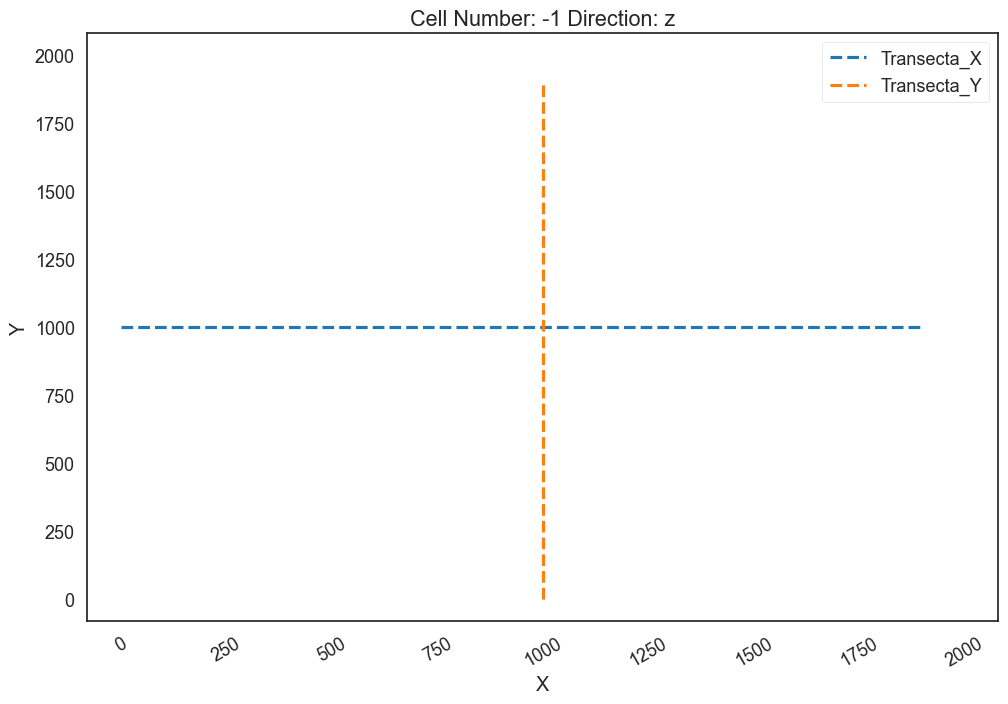

In [15]:
gpv.plot_section_traces(geo_model)

In [16]:
geo_model.interpolation_options.mesh_extraction = False


Setting Backend To: AvailableBackends.numpy
Chunking done: 6 chunks


c:\Users\gabri\anaconda3\envs\Auxiliatura_Devito\lib\site-packages\gempy_viewer\API\_plot_2d_sections_api.py:105: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
c:\Users\gabri\anaconda3\envs\Auxiliatura_Devito\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


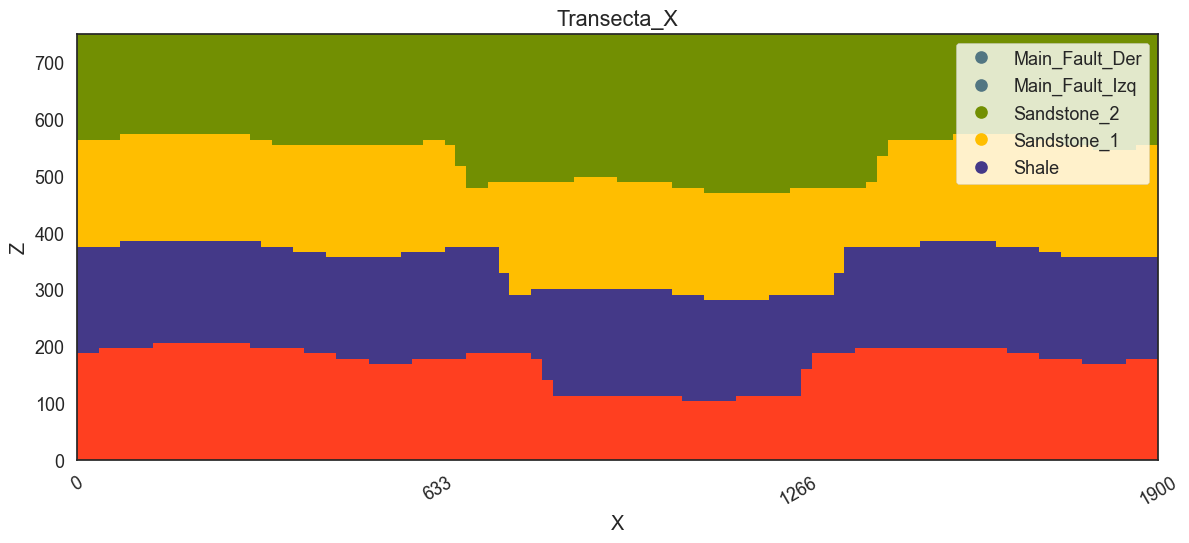

In [17]:
gp.compute_model(geo_model)
gpv.plot_2d(geo_model, 
            section_names=['Transecta_X'], 
            show_topography=False, 
            figsize=(12, 17), 
            show_block=False, 
            show_values=False, 
            n_axis=2, 
            legend=True,
            show_data=False, 
            )

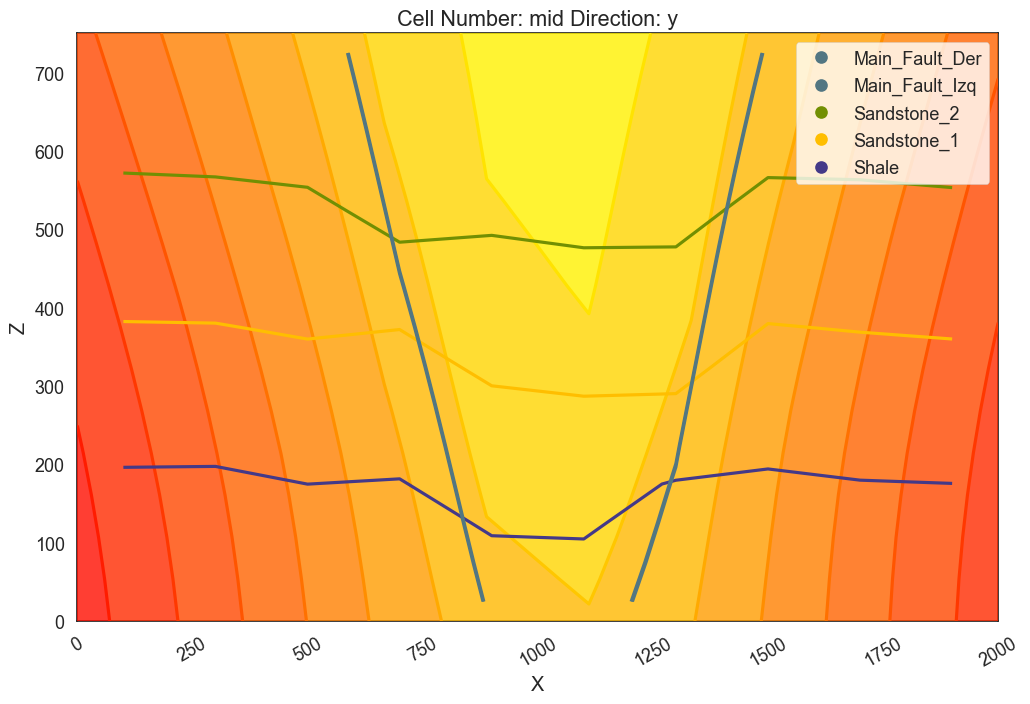

In [18]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the fault
    show_data=False,
    show_scalar=True,
    show_lith=False
)

In [19]:
grid = Grid()

In [20]:
# Obtener la malla regular
grid = geo_model.grid.regular_grid

# Obtener las coordenadas directamente de grid.values
cell_centers = grid.values

# Calcular el modelo litológico en los centros de las celdas
lith_block = gp.compute_model_at(geo_model, cell_centers)


Active grids: GridTypes.NONE|SECTIONS|CUSTOM|DENSE
Setting Backend To: AvailableBackends.numpy
Chunking done: 7 chunks


In [21]:
# from gempy.core.data.grid_modules import RegularGrid
# from gempy.core.data import Grid


# extent = np.array([0, 2000, 0, 2000, 0, 750])
# resolution = np.array([10, 10, 15])
# grid.dense_grid = RegularGrid(extent, resolution)
# gridi=grid.dense_grid
# cell_centers= gridi.values

# lith_block = gp.compute_model_at(geo_model, cell_centers)

In [22]:
from devito import *
%matplotlib inline

Valores únicos en lith_block: [3.         4.         4.         4.         4.         4.
 4.         4.99626079 4.99961795 4.99999989 4.99999993 5.
 5.         5.0259881  5.07807406 6.         6.         6.        ]
Capa 0: 0 m/s (asignada a 0 celdas)
Capa 1: 0 m/s (asignada a 0 celdas)
Capa 2: 0 m/s (asignada a 0 celdas)
Capa 3: 4000 m/s (asignada a 440 celdas)
Capa 4: 3500 m/s (asignada a 372 celdas)
Capa 5: 2000 m/s (asignada a 318 celdas)
Capa 6: 3000 m/s (asignada a 356 celdas)

Información del modelo:
StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault_Der,
	color=#527682,
	is_active=True
),
Element(
	name=Main_Fault_Izq,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#ffbe00,
	is_active=True

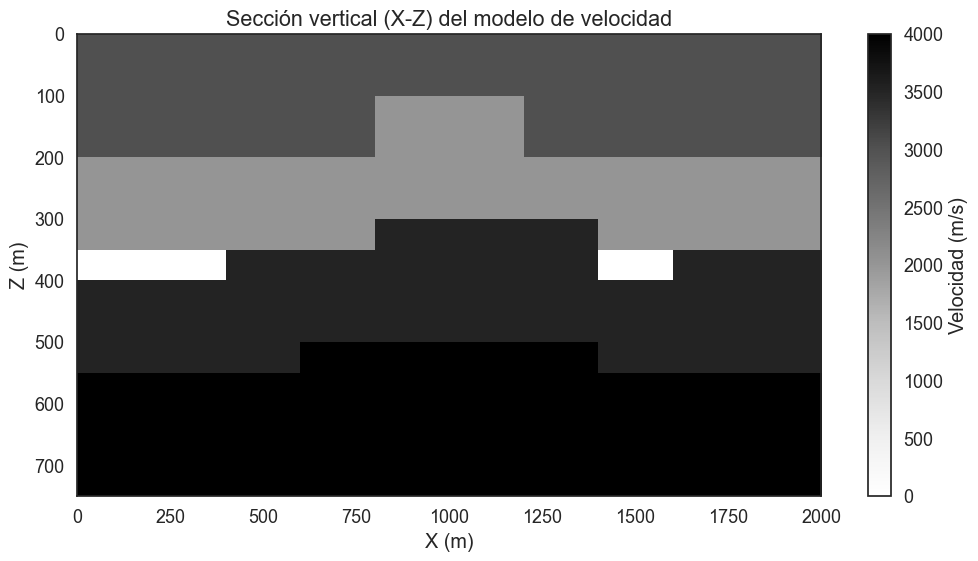

In [23]:
velocities = {
    0: 0,  
    1: 0,  
    2: 0,  
    3: 4000,  # Velocidad del basamento
    4: 3500,  # Velocidad del shale
    5: 2000,  # Velocidad del sandstone_1
    6: 3000,  # velocidad del sandstone_2
}
print("Valores únicos en lith_block:", np.unique(lith_block))

# Crear un array de velocidades basado en el bloque litológico
velocity_model = np.zeros_like(lith_block, dtype=float)
for i, (surface, velocity) in enumerate(velocities.items()):
    mask = lith_block == i
    velocity_model[mask] = velocity
    print(f"Capa {surface}: {velocity} m/s (asignada a {np.sum(mask)} celdas)")

# Imprimir información adicional
print("\nInformación del modelo:")
print(geo_model.structural_frame)

# Reshape el modelo de velocidad a las dimensiones de la malla
velocity_model = velocity_model.reshape(grid.resolution)
print("Forma del modelo de velocidad:", velocity_model.shape)
print("Rango de velocidades:", velocity_model.min(), "-", velocity_model.max())

# Visualizar una sección vertical (X-Z) del modelo de velocidad
plt.figure(figsize=(12, 6))
plt.imshow(velocity_model[:, velocity_model.shape[2]//2, :].T, 
           extent=[grid.extent[0], grid.extent[1], grid.extent[5], grid.extent[4]], 
           origin='upper', aspect='auto')
plt.colorbar(label='Velocidad (m/s)')
plt.title('Sección vertical (X-Z) del modelo de velocidad')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.show()


In [24]:
print("Forma del velocity_model:", velocity_model.shape)
print("Tamaño del velocity_model:", velocity_model.size)

Forma del velocity_model: (10, 10, 15)
Tamaño del velocity_model: 1500


In [30]:
# Sección en el plano X-Z
section_y = velocity_model.shape[1] // 2  # Tomar la sección del medio en Y
gempy_vp_2d = velocity_model[:, section_y, :]

# Voltear el eje Z para que la profundidad aumente hacia abajo
gempy_vp_2d = gempy_vp_2d[:, ::-1]

# Guardar esta sección 2D como un archivo .npy
np.save("modelo_gempy.npy", gempy_vp_2d)

# Imprimir la forma del nuevo modelo 2D
print("Forma del modelo 2D:", gempy_vp_2d.shape)

Forma del modelo 2D: (10, 15)


In [33]:
import numpy as np
from devito import configuration
from devito.data.allocators import MemoryAllocator
configuration['log-level'] = 'WARNING'
from devito import (Grid as DevGrid, TimeFunction, Constant, Function,
                    Eq, solve, Operator, configuration)
from examples.seismic import Model, AcquisitionGeometry, RickerSource, Receiver, plot_shotrecord, plot_velocity
from devito.types.basic import Scalar
from devito.types.sparse import SparseTimeFunction


# Definir los parámetros del modelo
shape = gempy_vp_2d.shape
spacing = (grid.dx, grid.dz)  # Usar el espaciado de tu modelo original
origin = (grid.extent[0], grid.extent[4])  # Usar el origen de tu modelo original

# Cargar el modelo 2D
gempy_vp = np.load("modelo_gempy.npy")
gempy_vp = gempy_vp/1000


# Crear el modelo de Devito
model2 = Model(vp=gempy_vp, origin=origin, shape=shape, spacing=spacing,
              nbl=40, space_order=4, bcs="damp", dtype=np.float32)

plot_velocity(model2)

# Configurar los parámetros de la simulación
t0 = 0.
tn = 1000. 
f0 = 0.008

#Coordenadas de la fuente (en la mitad:1000)
src_coordinates = np.empty((1, 2))
src_coordinates[:,0] = 1000
src_coordinates[:,1] = 0.  

#Coordenadas de los receptores (distribuidos en los 2000 m entre 20 receptores)
rec_coordinates = np.empty((20, 2))
rec_coordinates[:, 0] = np.linspace(0, 2000, num=20)
rec_coordinates[:, 1] = 0.

geometry = AcquisitionGeometry(model2, rec_coordinates, src_coordinates, t0, tn, f0=f0, src_type='Ricker')



RuntimeError: Couldn't find `libc`'s `posix_memalign` to allocate memory

In [28]:
#Graficando geometria de adquisición
plot_velocity(model2, source=geometry.src_positions,
              receiver=geometry.rec_positions)

NameError: name 'model2' is not defined

In [30]:
#Simulación
from examples.seismic.acoustic import AcousticWaveSolver
solver = AcousticWaveSolver(model2, geometry, space_order=4)
true_d, _, _ = solver.forward(vp=model2.vp)
plot_shotrecord(true_d.data, model2, t0, tn)

ModuleNotFoundError: No module named 'examples'